In [66]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [67]:
# Carregando as bibliotecas

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import lib
from scipy import stats as st


## Preparando os dados

In [68]:
# Lendo os dados

df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/games.csv')

In [69]:
df.info()
print()
df.sample(15)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
11296,My Stop Smoking Coach: Allen Carr's EasyWay,DS,2008.0,Misc,0.07,0.00,0.00,0.01,NaN,tbd,E
758,Tom Clancy's The Division,XOne,2016.0,Shooter,1.29,0.68,0.00,0.20,80.0,6.9,M
8011,Super Robot Taisen J,GBA,2005.0,Strategy,0.00,0.00,0.18,0.00,NaN,NaN,NaN
11374,MotoGP 14,X360,2014.0,Racing,0.04,0.03,0.00,0.01,NaN,tbd,E
4581,Yu-Gi-Oh! 7 Trials to Glory: World Championshi...,GBA,2005.0,Misc,0.30,0.11,0.00,0.01,NaN,NaN,NaN
5547,Discovery Kids: Puppy Playtime,DS,2009.0,Simulation,0.30,0.00,0.00,0.02,NaN,tbd,E
10314,The BIGS,PSP,2007.0,Sports,0.10,0.00,0.00,0.01,72.0,tbd,E
14747,Harukanaru Toki no Naka de 5: Kazahanaki,PSP,2012.0,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,NaN
5297,Command & Conquer: Red Alert 3 Ultimate Edition,PS3,2009.0,Strategy,0.14,0.15,0.00,0.06,NaN,NaN,NaN
9276,Shinobido 2: Tales of the Ninja,PSV,2011.0,Action,0.04,0.05,0.02,0.02,NaN,NaN,NaN


In [70]:
# Substituir os nomes das colunas (transformar tudo em minúsculos).

df.columns = df.columns.str.lower()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [71]:
# Convertendo user_score para float.

df['user_score'] = pd.to_numeric(df['user_score'], errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


In [72]:
# Lidando com dados ausentes

lib.clean_data(df, ['name', 'year_of_release', 'genre'])

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


In [73]:
# Calculando o total das vendas e adicionando o valor a uma nova coluna 'total_sales'

df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
6912,G.I. Joe: The Rise of Cobra,X360,2009.0,Action,0.17,0.05,0.00,0.02,42.0,4.7,T,0.24
12580,World Cup of Pool,DS,2009.0,Sports,0.06,0.00,0.00,0.00,NaN,NaN,E,0.06
9478,Sonic Riders,XB,2006.0,Racing,0.10,0.03,0.00,0.00,56.0,8.1,E,0.13
12806,ESPN International Winter Sports 2002,PS2,2002.0,Sports,0.03,0.02,0.00,0.01,62.0,NaN,E,0.06
2028,The Lost World: Jurassic Park,PS,1997.0,Action,0.57,0.39,0.00,0.07,NaN,NaN,NaN,1.03
6952,Big Family Games,Wii,2009.0,Misc,0.00,0.22,0.00,0.02,NaN,NaN,NaN,0.24
9576,Sengoku Basara 3 Utage,Wii,2011.0,Action,0.00,0.00,0.13,0.00,NaN,NaN,NaN,0.13
16354,Jinsei Game Q DS: Shouwa no Dekigoto,DS,2007.0,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
12312,Miami Vice: The Game,PSP,2006.0,Shooter,0.06,0.00,0.00,0.00,63.0,7.0,M,0.06
14143,Rebel Raiders: Operation Nighthawk,PS2,2006.0,Simulation,0.02,0.01,0.00,0.00,53.0,NaN,E10+,0.03


## Análise dos dados

### Lançamentos por ano

In [74]:
# Agrupando os lançamentos de jogos por ano.

df_year_of_release = lib.group_count(df, 'year_of_release', 'name')

df_year_of_release.info()

print(df_year_of_release)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year_of_release  37 non-null     float64
 1   count            37 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 724.0 bytes
    year_of_release  count
0            1980.0      9
1            1981.0     46
2            1982.0     36
3            1983.0     17
4            1984.0     14
5            1985.0     14
6            1986.0     21
7            1987.0     16
8            1988.0     15
9            1989.0     17
10           1990.0     16
11           1991.0     41
12           1992.0     43
13           1993.0     60
14           1994.0    121
15           1995.0    219
16           1996.0    263
17           1997.0    289
18           1998.0    379
19           1999.0    338
20           2000.0    350
21           2001.0    482
22           2002.0    829
23         

<Figure size 1000x800 with 0 Axes>

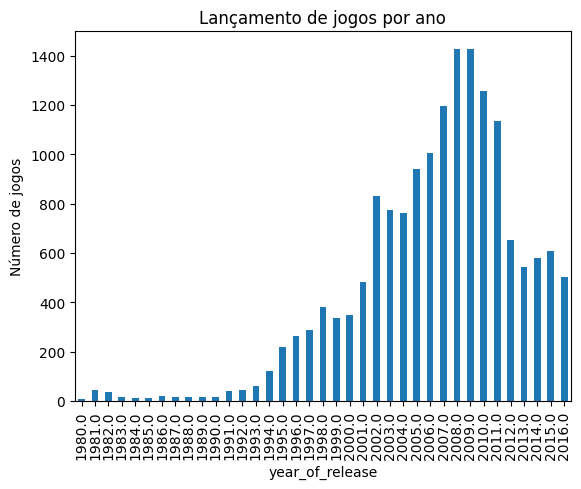

In [75]:

plt.figure(figsize=(10, 8))
df_year_of_release.plot(kind='bar', x='year_of_release', y='count', legend=None, rot=90)
plt.ylabel('Número de jogos')
plt.title('Lançamento de jogos por ano')
plt.show()

### Como as vendas variaram de plataforma para plataforma.

In [76]:
# Calculando o total de vendas por plataforma.

df_sales_per_platform = lib.group_sum(df, 'platform', 'total_sales')

df_sales_per_platform.head()

,platform,count
14,PCFX,0.03
9,GG,0.04
1,3DO,0.10
24,TG16,0.16
25,WS,1.42


<Axes: xlabel='platform'>

<Figure size 1000x600 with 0 Axes>

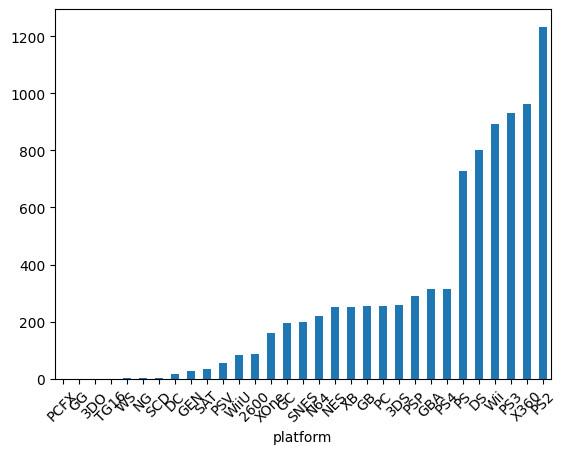

In [77]:
# type(plt.figure(figsize=(10, 8)))

lib.graph_bar(df_sales_per_platform, 'platform', 'count')

<Figure size 1000x800 with 0 Axes>

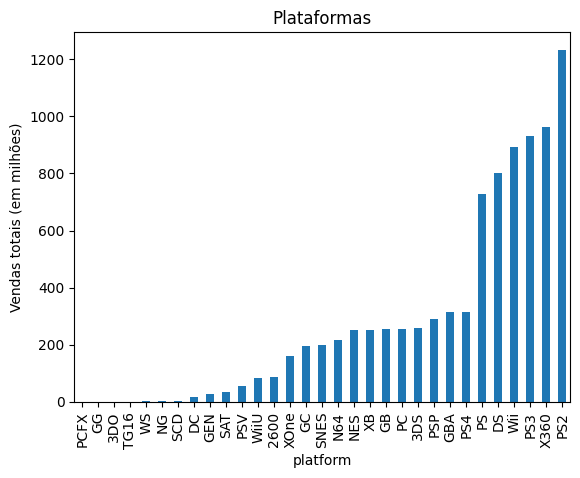

<class 'matplotlib.axes._axes.Axes'>


In [78]:
plt.figure(figsize=(10, 8))
g = df_sales_per_platform.plot(kind='bar', x='platform', y='count', legend=None, rot=90)
plt.ylabel('Vendas totais (em milhões)')
plt.title('Plataformas')
plt.show()

print(type(g))

### Plataformas com maiores vendas totais.

In [79]:
# Selecionando as principais plataformas e criando um gráfico com as vendas por ano.

top_platforms = ['PS', 'DS', 'Wii', 'PS3', 'X360', 'PS2']
df_top_sellers = df[df['platform'].isin(top_platforms)] 

In [80]:
# Agrupando as vendas por plataforma e

grouped_sales = lib.group_sum(df_top_sellers, 'platform', 'total_sales', 'year_of_release')


print(grouped_sales)

year_of_release  1985.0  1994.0  1995.0  1996.0  1997.0  1998.0  1999.0  \
platform                                                                  
DS                 0.02     NaN     NaN     NaN     NaN     NaN     NaN   
PS                  NaN    6.03   35.96    94.7  136.17  169.49  144.53   
PS2                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
PS3                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
Wii                 NaN     NaN     NaN     NaN     NaN     NaN     NaN   
X360                NaN     NaN     NaN     NaN     NaN     NaN     NaN   

year_of_release  2000.0  2001.0  2002.0  ...  2007.0  2008.0  2009.0  2010.0  \
platform                                 ...                                   
DS                  NaN     NaN     NaN  ...  146.94  145.31  119.54   85.02   
PS                96.37   35.59    6.67  ...     NaN     NaN     NaN     NaN   
PS2               39.17  166.43  205.38  ...   75.99   53.90   26.40    5.64   

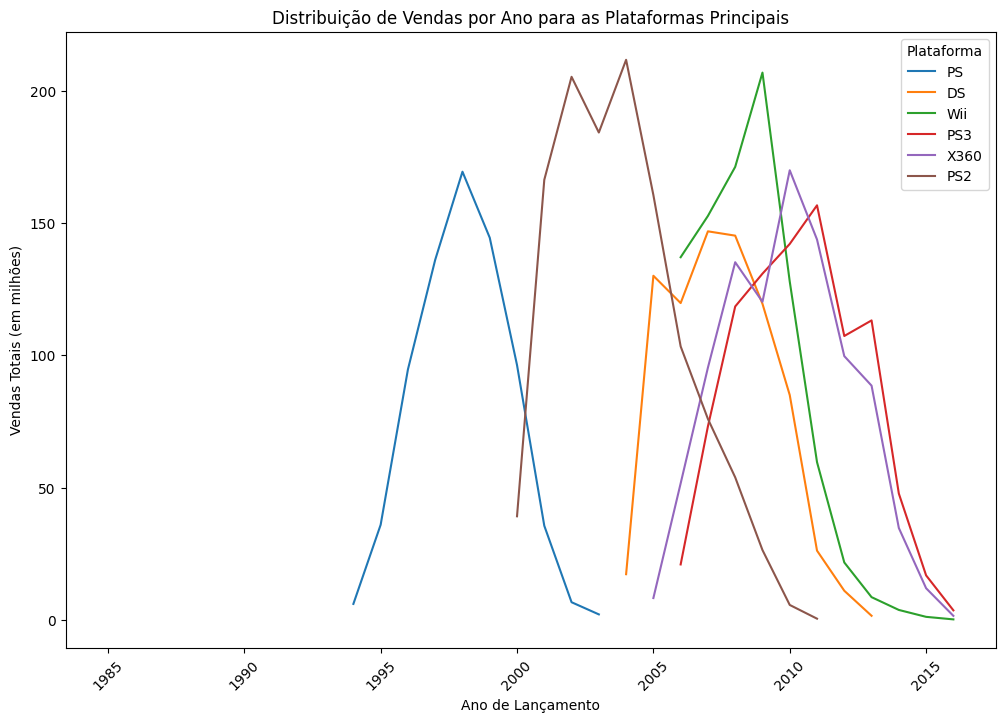

In [81]:
# Agrupando as vendas por plataforma e

plt.figure(figsize=(12, 8))
for platform in top_platforms:
    plt.plot(grouped_sales.loc[platform], label=platform)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Distribuição de Vendas por Ano para as Plataformas Principais')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()


### Determine para qual período você deve pegar dados

Analisando o gráfico acima, decidi trabalhar com o período de 2005 a 2015 (10 anos). É o período em que as maiores plataformas em vendas estão ativas e são mais variadas. O ano de 2016 tem poucos dados, o que sugere que não tem informações suficientes. O recorte 2005-2015 são os dados mais relevantes para coniderar propostas para o ano de 2017.

In [82]:
# Filtrando os dados relevantes

df = df[df['year_of_release'] > 2005]
df = df[df['year_of_release'] < 2016]
        
df.info()
df.sample(10)

<class 'pandas.core.frame.DataFrame'>
Index: 9831 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             9831 non-null   object 
 1   platform         9831 non-null   object 
 2   year_of_release  9831 non-null   float64
 3   genre            9831 non-null   object 
 4   na_sales         9831 non-null   float64
 5   eu_sales         9831 non-null   float64
 6   jp_sales         9831 non-null   float64
 7   other_sales      9831 non-null   float64
 8   critic_score     4758 non-null   float64
 9   user_score       4693 non-null   float64
 10  rating           6324 non-null   object 
 11  total_sales      9831 non-null   float64
dtypes: float64(8), object(4)
memory usage: 998.5+ KB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15283,Freedom Wings,DS,2006.0,Simulation,0.02,0.00,0.00,0.00,46.0,7.7,E10+,0.02
10893,Adventure Time: Finn & Jake Investigations,PS4,2015.0,Action,0.03,0.05,0.00,0.02,NaN,NaN,NaN,0.10
2008,Guinness World Records: The Videogame,Wii,2008.0,Action,0.46,0.47,0.00,0.11,67.0,7.0,E10+,1.04
460,LEGO Batman: The Videogame,DS,2008.0,Action,1.75,1.01,0.00,0.29,72.0,8.0,E10+,3.05
15327,G1 Jockey Wii,Wii,2007.0,Sports,0.00,0.00,0.02,0.00,NaN,NaN,NaN,0.02
8997,Rubik's World,Wii,2008.0,Puzzle,0.12,0.01,0.00,0.01,64.0,NaN,E,0.14
2686,Metroid Prime Hunters,DS,2006.0,Shooter,0.57,0.04,0.11,0.06,85.0,8.0,T,0.78
6379,Tropico 4,PC,2011.0,Strategy,0.10,0.13,0.00,0.04,78.0,7.7,T,0.27
8429,Green Lantern: Rise of the Manhunters,PS3,2011.0,Action,0.09,0.05,0.00,0.02,61.0,6.7,T,0.16
5239,NHL 2K10,PS2,2009.0,Sports,0.17,0.14,0.00,0.05,NaN,8.5,E10+,0.36


### Quais plataformas estão liderando em vendas? 

In [83]:
# Elencando as plataformas líderes em venda.

leading_platforms = lib.group_sum(df, 'platform', 'total_sales')

print(leading_platforms)

   platform   count
1        DC    0.06
3       GBA    8.68
14       XB   10.77
4        GC   11.53
10      PSV   49.56
12     WiiU   77.59
15     XOne  133.17
5        PC  158.17
9       PSP  238.63
0       3DS  242.67
8       PS4  244.89
6       PS2  265.80
2        DS  655.35
11      Wii  891.00
7       PS3  927.74
13     X360  951.47


In [84]:
# Selecionando as plataformas potencialmente lucrativas.

lead_platforms = ['Wii', 'PS3', 'X360']

platform_sales = df[df['platform'].isin(lead_platforms)]

platform_sales.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3754 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             3754 non-null   object 
 1   platform         3754 non-null   object 
 2   year_of_release  3754 non-null   float64
 3   genre            3754 non-null   object 
 4   na_sales         3754 non-null   float64
 5   eu_sales         3754 non-null   float64
 6   jp_sales         3754 non-null   float64
 7   other_sales      3754 non-null   float64
 8   critic_score     2250 non-null   float64
 9   user_score       2322 non-null   float64
 10  rating           2899 non-null   object 
 11  total_sales      3754 non-null   float64
dtypes: float64(8), object(4)
memory usage: 381.3+ KB


In [85]:
lead_platforms_sales = lib.group_sum(platform_sales, 'platform', 'total_sales', 'year_of_release')


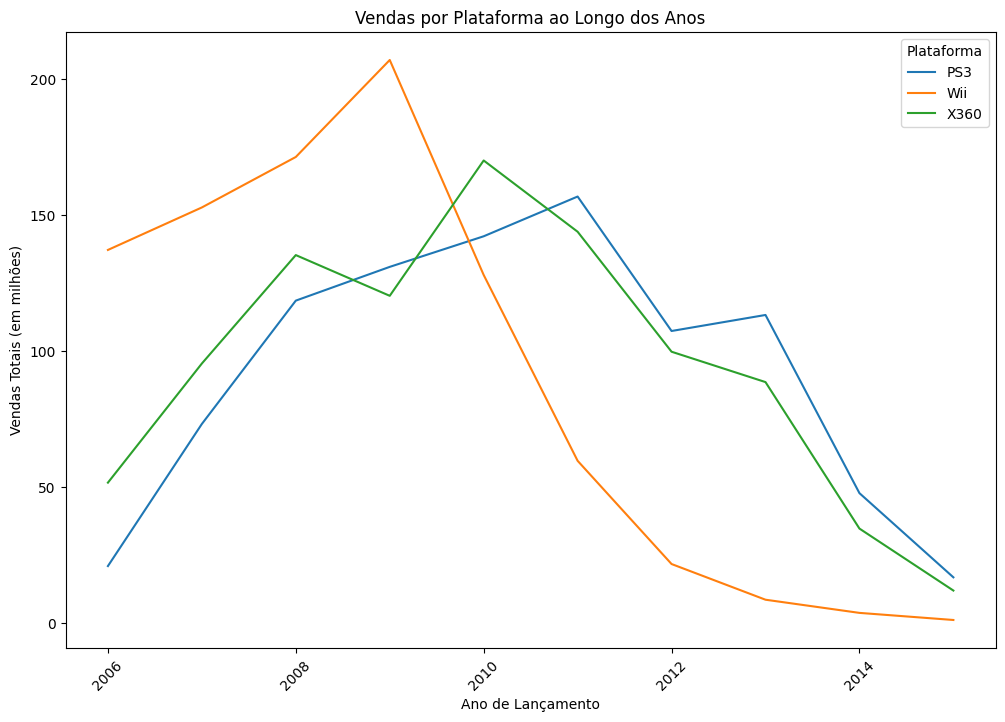

In [86]:
# Plotando um gráfico das vendas das principais plataformas para o período selecionado. 


plt.figure(figsize=(12, 8))
for platform in lead_platforms_sales.index:
    plt.plot(lead_platforms_sales.columns, lead_platforms_sales.loc[platform], label=platform)

plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Totais (em milhões)')
plt.title('Vendas por Plataforma ao Longo dos Anos')
plt.legend(title='Plataforma')
plt.xticks(rotation=45)
plt.show()

O gráfico mostra o pico de vendas de cada uma das plataformas: primeiro Wii em 2009, seguido por X360 em 2010 e PS3 em 2011. 

X360 e PS3 têm volumes de venda parecidos no período, enquanto Wii tem um auge seguido por uma queda vertiginosa até 2012.

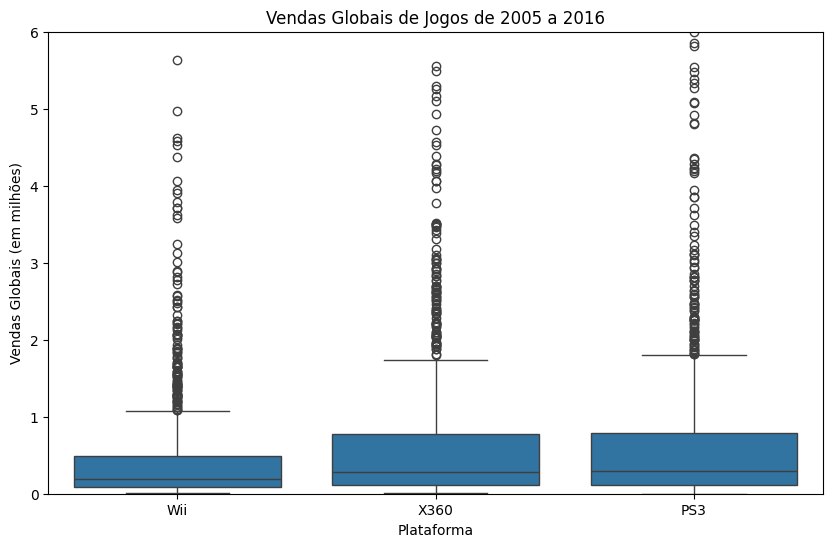

In [87]:
# Plotando um diagrama de caixa para comparar as vendas das principais plataformas para o período selecionado.

lead_platforms_sales = platform_sales.groupby('platform')['total_sales']

plt.figure(figsize=(10, 6))

sns.boxplot(data=platform_sales, x='platform', y='total_sales')
plt.xlabel('Plataforma')
plt.ylabel('Vendas Globais (em milhões)')
plt.title('Vendas Globais de Jogos de 2005 a 2016')

plt.ylim(0, 6)

plt.show()

As plataformas X360 e PS3 têm maior volume de vendas no período analisado, assim como uma média mais alta que a platafoma Wii. 
Mas entre as duas, as vendas são pareadas.

### Como avaliações afetam as vendas?


In [88]:
# Eliminando dados ausentes nas colunas de avaliações.

df_scores = lib.clean_data(df, 'critic_score')
df_scores = lib.clean_data(df_scores, 'user_score')
df_scores = lib.clean_data(df_scores, 'rating')


df_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4186 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4186 non-null   object 
 1   platform         4186 non-null   object 
 2   year_of_release  4186 non-null   float64
 3   genre            4186 non-null   object 
 4   na_sales         4186 non-null   float64
 5   eu_sales         4186 non-null   float64
 6   jp_sales         4186 non-null   float64
 7   other_sales      4186 non-null   float64
 8   critic_score     4186 non-null   float64
 9   user_score       4186 non-null   float64
 10  rating           4186 non-null   object 
 11  total_sales      4186 non-null   float64
dtypes: float64(8), object(4)
memory usage: 425.1+ KB


In [89]:
# Selecionando plataforma Wii

wii_scores = df_scores.loc[df_scores['platform'] == 'Wii']

wii_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 479 entries, 0 to 16308
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             479 non-null    object 
 1   platform         479 non-null    object 
 2   year_of_release  479 non-null    float64
 3   genre            479 non-null    object 
 4   na_sales         479 non-null    float64
 5   eu_sales         479 non-null    float64
 6   jp_sales         479 non-null    float64
 7   other_sales      479 non-null    float64
 8   critic_score     479 non-null    float64
 9   user_score       479 non-null    float64
 10  rating           479 non-null    object 
 11  total_sales      479 non-null    float64
dtypes: float64(8), object(4)
memory usage: 48.6+ KB


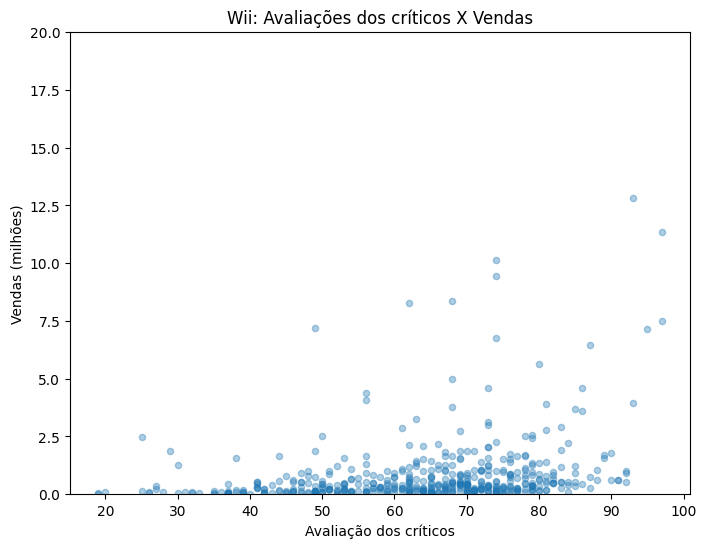

In [90]:
# Plotando um gráfico de dispersão sobre a correlação entre revisões dos críticos e vendas.

wii_scores.plot(x= 'critic_score',
               y= 'total_sales', 
               kind= 'scatter', 
               title= 'Wii: Avaliações dos críticos X Vendas', 
               alpha= 0.36, figsize=[8,6], 
               xlabel= 'Avaliação dos críticos', 
               ylabel='Vendas (milhões)')
plt.ylim(0,20) # Estabelecendo um limite de 20 milhões para melhor visualização do gráfico
plt.show()

O gráfico indica uma correlação positiva entre as notas dos críticos e o volume de vendas. Quanto maior a avaliação, maior volume de vendas.

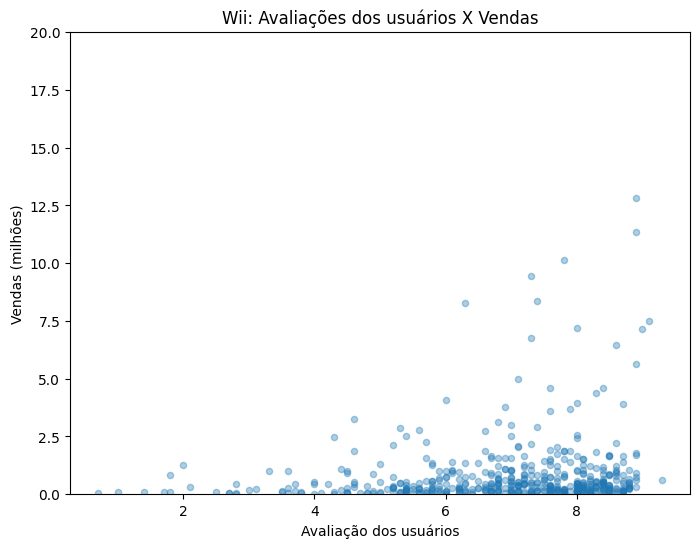

In [91]:
# Plotando um gráfico de dispersão sobre a correlação entre revisões dos usuários e vendas.

wii_scores.plot(x= 'user_score',
               y= 'total_sales', 
               kind= 'scatter', 
               title= 'Wii: Avaliações dos usuários X Vendas', 
               alpha= 0.36, figsize=[8,6], 
               xlabel= 'Avaliação dos usuários', 
               ylabel='Vendas (milhões)')
plt.ylim(0,20) # Estabelecendo um limite de 20 milhões para melhor visualização do gráfico
plt.show()

Também há uma correlação positiva, porém mais dispersão, o que indica um coeficiente menor.

In [92]:
# Correlação entre avaliação dos críticos e vendas

cs_corr = lib.corr(wii_scores['critic_score'], wii_scores['total_sales'])

print(cs_corr)

0.1707254398474701


In [93]:
# Correlação entre avaliação dos usuários e vendas

us_corr = lib.corr(wii_scores['user_score'], wii_scores['total_sales'])

print(us_corr)

0.11098055169353932


As avaliações dos críticos e usuários podem influenciar nas vendas dos jogos. Existe uma correlação entre avaliações mais altas e maiores volumes de venda, mas não é uma correlação forte. Os usuários têm uma tendência a avaliar os jogos com classificações mais altas.

### Tendo suas conclusões em mente, compare as vendas dos mesmos jogos em outras plataformas.


In [94]:
ps3_scores = df_scores.loc[df_scores['platform'] == 'PS3']

ps3_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 16 to 16230
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             769 non-null    object 
 1   platform         769 non-null    object 
 2   year_of_release  769 non-null    float64
 3   genre            769 non-null    object 
 4   na_sales         769 non-null    float64
 5   eu_sales         769 non-null    float64
 6   jp_sales         769 non-null    float64
 7   other_sales      769 non-null    float64
 8   critic_score     769 non-null    float64
 9   user_score       769 non-null    float64
 10  rating           769 non-null    object 
 11  total_sales      769 non-null    float64
dtypes: float64(8), object(4)
memory usage: 78.1+ KB


In [95]:
# Correlação entre avaliação dos críticos e vendas

cs_ps3_corr = lib.corr(ps3_scores['critic_score'], ps3_scores['total_sales'])

print(cs_ps3_corr)

0.42752262629202126


In [96]:
# Correlação entre avaliação dos usuários e vendas

us_ps3_corr = lib.corr(ps3_scores['user_score'], ps3_scores['total_sales'])

print(us_ps3_corr)

0.14622122854563813


In [97]:
# Selecionando as outras plataformas

x360_scores = df_scores.loc[df_scores['platform'] == 'X360']

x360_scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 842 entries, 14 to 16613
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             842 non-null    object 
 1   platform         842 non-null    object 
 2   year_of_release  842 non-null    float64
 3   genre            842 non-null    object 
 4   na_sales         842 non-null    float64
 5   eu_sales         842 non-null    float64
 6   jp_sales         842 non-null    float64
 7   other_sales      842 non-null    float64
 8   critic_score     842 non-null    float64
 9   user_score       842 non-null    float64
 10  rating           842 non-null    object 
 11  total_sales      842 non-null    float64
dtypes: float64(8), object(4)
memory usage: 85.5+ KB


In [98]:
# Correlação entre avaliação dos críticos e vendas

us_x360_corr = lib.corr(x360_scores['user_score'], x360_scores['total_sales'])

print(us_x360_corr)

0.11384109634774177


Para as três plataformas, a correlação entre as avaliações dos criticos e as vendas é maior do que a correlação dos usuários.

### Distribuição de jogos por gênero

In [99]:
# Lendo os dados sobre gêneros.

df.info()
print()

genre_count = df['genre'].nunique()

unique_genres = df['genre'].unique()
print(genre_count, unique_genres)

<class 'pandas.core.frame.DataFrame'>
Index: 4186 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4186 non-null   object 
 1   platform         4186 non-null   object 
 2   year_of_release  4186 non-null   float64
 3   genre            4186 non-null   object 
 4   na_sales         4186 non-null   float64
 5   eu_sales         4186 non-null   float64
 6   jp_sales         4186 non-null   float64
 7   other_sales      4186 non-null   float64
 8   critic_score     4186 non-null   float64
 9   user_score       4186 non-null   float64
 10  rating           4186 non-null   object 
 11  total_sales      4186 non-null   float64
dtypes: float64(8), object(4)
memory usage: 425.1+ KB

12 ['Sports' 'Racing' 'Platform' 'Misc' 'Action' 'Shooter' 'Fighting'
 'Simulation' 'Role-Playing' 'Adventure' 'Puzzle' 'Strategy']


In [100]:
# Elencando os gêneros por volume de vendas.

genre_sales = lib.group_sum(df, 'genre', 'total_sales')

print(genre_sales)

           genre   count
11      Strategy   46.69
5         Puzzle   48.03
1      Adventure   55.45
9     Simulation  119.55
2       Fighting  143.85
4       Platform  232.17
6         Racing  240.74
7   Role-Playing  328.48
3           Misc  329.19
10        Sports  561.24
8        Shooter  596.37
0         Action  826.85


<Figure size 1000x600 with 0 Axes>

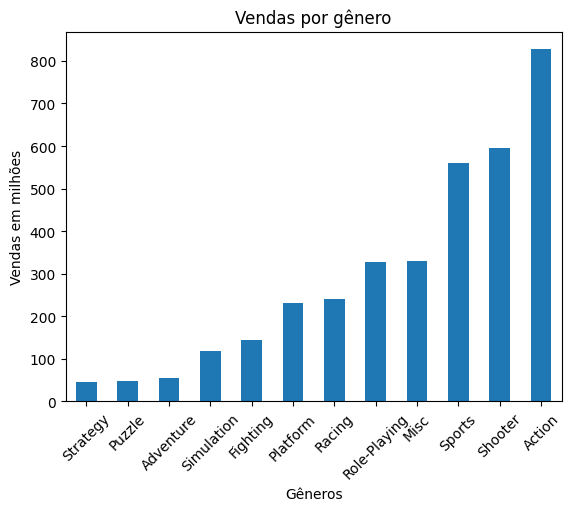

In [101]:

plt.figure(figsize=(10, 6))
genre_sales.plot(kind='bar', x='genre', y='count', legend=None, rot=45)
plt.xlabel('Gêneros')
plt.ylabel('Vendas em milhões')
plt.title('Vendas por gênero')
plt.show()


Os gêneros "action", "shooter" e "sports" são os três gêneros mais vendidos, há um volume consideravelmente maior em relação ao gênero que vem em quarto lugar. Ainda entre os três gêneros mais lucrativos, "ação" tem um volume consideravelmente maior que os colocados em segundo e terceiro lugar.

Não são dados suficientes para generalizar sobre vendas relacionadas a gênero, pois é preciso saber quantos jogos existem para cada categoria também.

### As cinco principais plataformas em cada região

In [128]:
# As cinco plataformas principais na América do Norte.

df.info()
print()

na_sales = lib.group_sum(df, 'platform', 'na_sales')
print(na_sales)

<class 'pandas.core.frame.DataFrame'>
Index: 4186 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4186 non-null   object 
 1   platform         4186 non-null   object 
 2   year_of_release  4186 non-null   float64
 3   genre            4186 non-null   object 
 4   na_sales         4186 non-null   float64
 5   eu_sales         4186 non-null   float64
 6   jp_sales         4186 non-null   float64
 7   other_sales      4186 non-null   float64
 8   critic_score     4186 non-null   float64
 9   user_score       4186 non-null   float64
 10  rating           4186 non-null   object 
 11  total_sales      4186 non-null   float64
dtypes: float64(8), object(4)
memory usage: 425.1+ KB

   platform   count
2       GBA    1.44
13       XB    5.94
3        GC    6.98
9       PSV    9.82
11     WiiU   29.06
4        PC   39.47
0       3DS   47.98
8       PSP   57.08
14     XOne   62.9

In [103]:
top_na_sales = {'X360' : 527.02,
                'Wii' : 342.91,
                'PS3' :  341.62
               }

print(top_na_sales)

{'X360': 527.02, 'Wii': 342.91, 'PS3': 341.62}


In [129]:
# As cinco plataformas principais na Eruopa.

eu_sales = lib.group_sum(df, 'platform', 'eu_sales')
print(eu_sales)

   platform   count
2       GBA    0.54
13       XB    1.52
3        GC    1.90
9       PSV    8.53
11     WiiU   19.43
5       PS2   19.63
0       3DS   32.91
14     XOne   33.34
8       PSP   39.88
1        DS   64.56
4        PC   81.82
7       PS4   84.13
10      Wii  204.13
12     X360  233.93
6       PS3  273.50


In [105]:
top_eu_sales = {'PS3' : 273.50,
                'X360' : 233.93,
                'Wii' :  204.13
               }

print(top_eu_sales)

{'PS3': 273.5, 'X360': 233.93, 'Wii': 204.13}


In [130]:
# As cinco plataformas principais no Japão.

jp_sales = lib.group_sum(df, 'platform', 'jp_sales')
print(jp_sales)

   platform  count
4        PC   0.00
13       XB   0.00
3        GC   0.08
14     XOne   0.28
2       GBA   0.54
7       PS4   6.79
9       PSV   7.13
11     WiiU   9.79
12     X360   9.85
5       PS2  13.12
8       PSP  22.43
0       3DS  32.61
10      Wii  52.37
6       PS3  54.52
1        DS  58.29


In [107]:
top_jp_sales = {'DS' : 58.29,
                'PS3' : 54.52,
                'Wii' : 52.37
               }

print(top_jp_sales)

{'DS': 58.29, 'PS3': 54.52, 'Wii': 52.37}


In [108]:
# Variações das suas quotas de mercado de região para região.

print('Vendas na América do Norte', top_na_sales)
print('Vendas na Europa:', top_eu_sales)
print('Vendas no Japão:', top_jp_sales)

Vendas na América do Norte {'X360': 527.02, 'Wii': 342.91, 'PS3': 341.62}
Vendas na Europa: {'PS3': 273.5, 'X360': 233.93, 'Wii': 204.13}
Vendas no Japão: {'DS': 58.29, 'PS3': 54.52, 'Wii': 52.37}


In [109]:
# Criando um dataframe com os dados.


df_top_sales = {'América do Norte': top_na_sales,
                'Europa': top_eu_sales,
                'Japão': top_jp_sales}

df_top_sales = pd.DataFrame(df_top_sales)


print(df_top_sales)

      América do Norte  Europa  Japão
X360            527.02  233.93    NaN
Wii             342.91  204.13  52.37
PS3             341.62  273.50  54.52
DS                 NaN     NaN  58.29


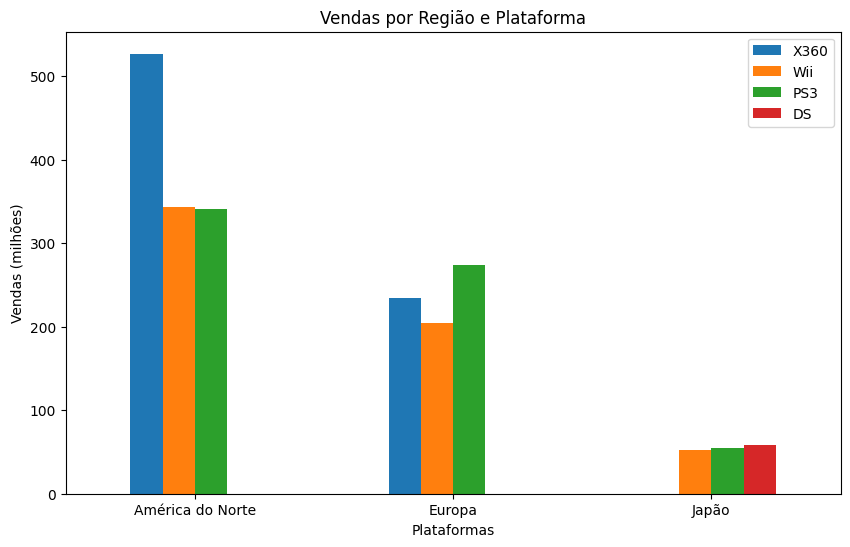

In [110]:
# Plotando um gráfico das vendas por plataforma nas regiões.

df_top_sales.T.plot(kind='bar', figsize=(10, 6), rot=0)

plt.xlabel('Plataformas')
plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Região e Plataforma')

plt.show()

### Os cinco principais gêneros em cada região

In [137]:
# Os cinco principais gêneros na América do Norte.

na_genres = lib.group_sum(df, 'genre', 'na_sales').nlargest(5, columns='count')

df_na_genres = pd.DataFrame(na_genres)

print(df_na_genres)

           genre   count
0         Action  400.48
8        Shooter  316.75
10        Sports  295.55
3           Misc  182.21
7   Role-Playing  147.20


In [138]:
# Os cinco principais gêneros na Europa.

eu_genres = lib.group_sum(df, 'genre', 'eu_sales').nlargest(5, columns='count')

df_eu_genres = pd.DataFrame(eu_genres)

print(df_eu_genres)

      genre   count
0    Action  274.62
8   Shooter  194.82
10   Sports  172.63
6    Racing   93.27
3      Misc   92.61


In [139]:
# Os cinco principais gêneros no Japão.

jp_genres = lib.group_sum(df, 'genre', 'jp_sales').nlargest(5, columns='count')

df_jp_genres = pd.DataFrame(jp_genres)

print(df_jp_genres)

           genre  count
7   Role-Playing  73.88
0         Action  46.92
4       Platform  31.52
10        Sports  25.56
3           Misc  21.51


In [114]:
# Criando um dataframe com as vendas por gênero em cada região.

df_merged_genres = df_na_genres.merge(df_eu_genres, on='genre').merge(df_jp_genres, on='genre', how='outer')

print(df_merged_genres)

              na_sales  eu_sales  jp_sales
genre                                     
Action          400.48    274.62     46.92
Misc            182.21     92.61     21.51
Platform           NaN       NaN     31.52
Role-Playing       NaN       NaN     73.88
Shooter         316.75    194.82       NaN
Sports          295.55    172.63     25.56


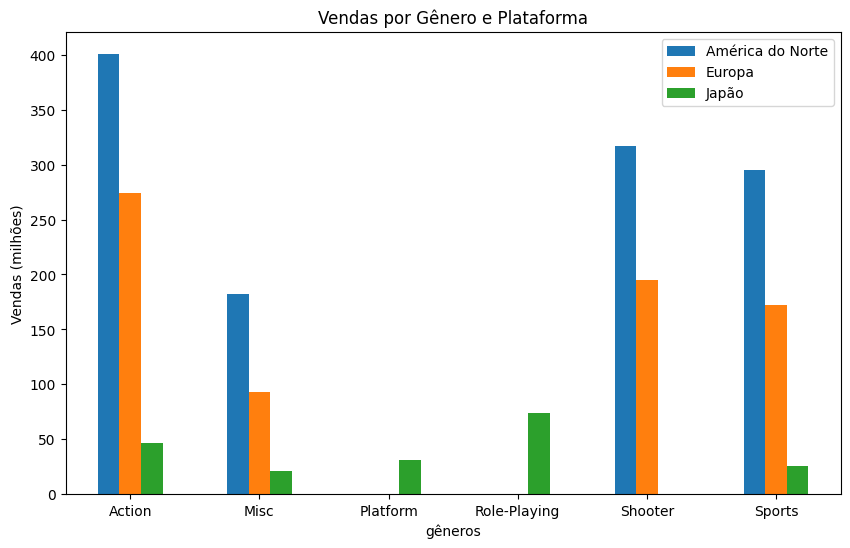

In [140]:
# Plotando um gráfico.

df_merged_genres.plot(kind='bar', figsize=(10, 6), rot=0)

plt.xlabel('gêneros')
plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Gênero e Plataforma')
plt.legend(['América do Norte', 'Europa', 'Japão'])

plt.show()

### Classificações ESRB

In [141]:
# Calculando as vendas por classificação.

na_rating = lib.group_sum(df, 'rating', 'na_sales')

df_na_rating = pd.DataFrame(na_rating)

print(na_rating)

  rating   count
3     RP    0.00
1   E10+  258.21
4      T  376.80
2      M  542.28
0      E  577.96


In [142]:
eu_rating = lib.group_sum(df, 'rating', 'eu_sales')

df_eu_rating = pd.DataFrame(eu_rating)

print(df_eu_rating)

  rating   count
3     RP    0.03
1   E10+  145.55
4      T  210.15
2      M  370.59
0      E  373.43


In [143]:
jp_rating = lib.group_sum(df, 'rating', 'jp_sales')

df_jp_rating = pd.DataFrame(jp_rating)

print(df_jp_rating)

  rating   count
3     RP    0.00
1   E10+   34.75
2      M   41.30
4      T   76.70
0      E  115.05


In [119]:
# Criando um dataframe com as vendas por classificação em cada região.

df_merged_ratings = df_na_rating.merge(df_eu_rating, on='rating').merge(df_jp_rating, on='rating', how='outer')

print(df_merged_ratings)

        na_sales  eu_sales  jp_sales
rating                              
E         577.96    373.43    115.05
E10+      258.21    145.55     34.75
M         542.28    370.59     41.30
RP          0.00      0.03      0.00
T         376.80    210.15     76.70


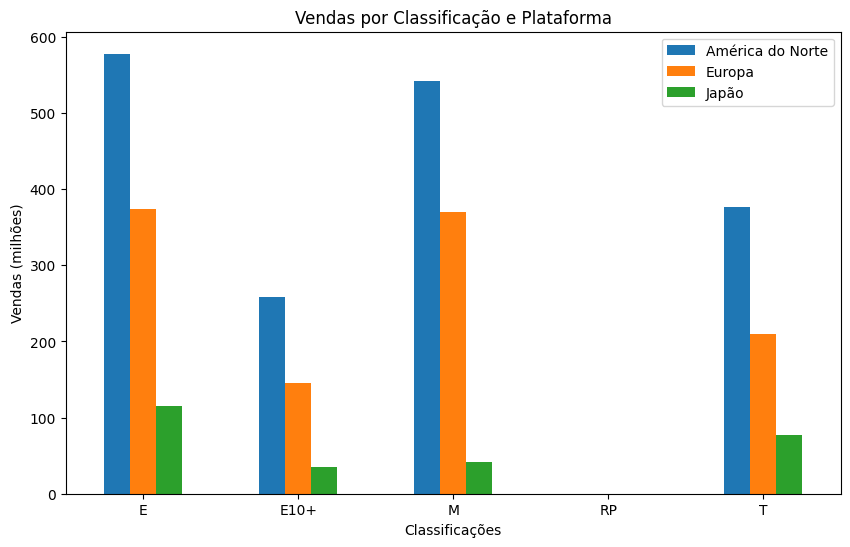

In [120]:
# Plotando um gráfico.

df_merged_ratings.plot(kind='bar', figsize=(10, 6), rot=0)

plt.xlabel('Classificações')
plt.ylabel('Vendas (milhões)')
plt.title('Vendas por Classificação e Plataforma')
plt.legend(['América do Norte', 'Europa', 'Japão'])

plt.show()

## Testando hipóteses

### As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

In [121]:
# Visualizando as plataformas.

df.info()
print()

platform_count = df['platform'].nunique()
unique_platform = df['platform'].unique()
print(platform_count, unique_platform)

<class 'pandas.core.frame.DataFrame'>
Index: 4186 entries, 0 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             4186 non-null   object 
 1   platform         4186 non-null   object 
 2   year_of_release  4186 non-null   float64
 3   genre            4186 non-null   object 
 4   na_sales         4186 non-null   float64
 5   eu_sales         4186 non-null   float64
 6   jp_sales         4186 non-null   float64
 7   other_sales      4186 non-null   float64
 8   critic_score     4186 non-null   float64
 9   user_score       4186 non-null   float64
 10  rating           4186 non-null   object 
 11  total_sales      4186 non-null   float64
dtypes: float64(8), object(4)
memory usage: 425.1+ KB

15 ['Wii' 'DS' 'X360' 'PS3' '3DS' 'PS4' 'PC' 'WiiU' 'PS2' 'PSP' 'XOne' 'GC'
 'PSV' 'GBA' 'XB']


In [122]:
# Selecionando os dados.

df_pc = df.loc[df['platform'] == 'PC']
df_xone = df.loc[df['platform'] == 'XOne']

df_pc.info()
print()
df_xone.info()

<class 'pandas.core.frame.DataFrame'>
Index: 495 entries, 85 to 16702
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             495 non-null    object 
 1   platform         495 non-null    object 
 2   year_of_release  495 non-null    float64
 3   genre            495 non-null    object 
 4   na_sales         495 non-null    float64
 5   eu_sales         495 non-null    float64
 6   jp_sales         495 non-null    float64
 7   other_sales      495 non-null    float64
 8   critic_score     495 non-null    float64
 9   user_score       495 non-null    float64
 10  rating           495 non-null    object 
 11  total_sales      495 non-null    float64
dtypes: float64(8), object(4)
memory usage: 50.3+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 165 to 16597
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0 

In [123]:
# Extraindo a média.

pc_mean = df_pc['user_score'].mean()
xone_mean = df_xone['user_score'].mean()

print('Média das avaliações dos usuários da plataforma PC:', pc_mean)
print('Média das avaliações dos usuários da plataforma XOne:', xone_mean)

Média das avaliações dos usuários da plataforma PC: 6.864646464646465
Média das avaliações dos usuários da plataforma XOne: 6.431730769230769


In [124]:
# Testando a hipótese.

alpha = 0.05  

platform_results = st.ttest_ind(df_pc['user_score'], df_xone['user_score']) 

print('valor-p: ', platform_results.pvalue) 

if platform_results.pvalue < alpha: 
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  0.005925417186712776
Rejeitamos a hipótese nula


### As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

In [125]:
# Selecionando os dados.

df_action = df.loc[df['genre'] == 'Action']
df_sports = df.loc[df['genre'] == 'Sports']

df_action.info()
print()
df_sports.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1105 entries, 16 to 16692
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1105 non-null   object 
 1   platform         1105 non-null   object 
 2   year_of_release  1105 non-null   float64
 3   genre            1105 non-null   object 
 4   na_sales         1105 non-null   float64
 5   eu_sales         1105 non-null   float64
 6   jp_sales         1105 non-null   float64
 7   other_sales      1105 non-null   float64
 8   critic_score     1105 non-null   float64
 9   user_score       1105 non-null   float64
 10  rating           1105 non-null   object 
 11  total_sales      1105 non-null   float64
dtypes: float64(8), object(4)
memory usage: 112.2+ KB

<class 'pandas.core.frame.DataFrame'>
Index: 529 entries, 0 to 16528
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0 

In [126]:
# Extraindo a média.

action_mean = df_action['user_score'].mean()
sports_mean = df_sports['user_score'].mean()

print('Média das avaliações dos usuários do gênero de Ação:', action_mean)
print('Média das avaliações dos usuários do gênero de Esportes:', sports_mean)

Média das avaliações dos usuários do gênero de Ação: 6.929773755656108
Média das avaliações dos usuários do gênero de Esportes: 6.606805293005671


In [127]:
# Testando a hipótese.

alpha = 0.05  

genre_results = st.ttest_ind(df_action['user_score'], df_sports['user_score']) 

print('valor-p: ', genre_results.pvalue) 

if genre_results.pvalue < alpha: 
    print("Rejeitamos a hipótese nula")
else:
    print("Não podemos rejeitar a hipótese nula")

valor-p:  7.683590847708939e-06
Rejeitamos a hipótese nula


## Conclusão



As plataformas mais relevantes para analisar volumes de vendas são as plataformas PS3 e X360, são elas que têm a maior fatia do mercado.

Jogos com avaliações altas dos críticos tendem a performar melhor nas vendas. 

O mercado japonês difere nas vendas por gênero e plataformas em relação ao mercado norte americano e europeu, que são similares entre si. 

Jogos com classificação sem restrição ou público específico podem alcançar mais vendas.